# Installing Required Libraries

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 14.6 MB/s eta 0:00:00a 0:00:01


In [ ]:
import os  # Ensure the os module is imported

# Dictionary to store the files in different folders
dataset_files = {}

# Traverse the dataset directory and store the files in respective keys
for dirname, _, filenames in os.walk('/kaggle/input/'):
    dataset_files[dirname] = filenames

# Optionally, you can check the dictionary structure like this
# (printing only folder names to confirm)
for key in dataset_files:
    print(f"Directory: {key}, Files: {len(dataset_files[key])} files found")


Directory: /kaggle/input/, Files: 0 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection, Files: 0 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3, Files: 1 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid, Files: 0 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/labels, Files: 623 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images, Files: 623 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test, Files: 308 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train, Files: 0 files found
Directory: /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/labels

# Loading required directories

In [ ]:
train_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/images'
val_dir = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/images'


# Training Yolo11

In [ ]:
import os
os.environ['WANDB_MODE'] = 'offline'

from ultralytics import YOLO

# Load a pretrained YOLO11 model
model = YOLO('yolo11s.pt')

model.train(
    data='/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml',
    epochs=40,
    imgsz=640,
    batch=8,
    workers=4,
    augment=True,
    name='yolov8_training_split',
    save=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 134MB/s] 


Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml, epochs=40, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8_training_split, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]
2024-10-28 07:04:45,488	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-28 07:04:46,424	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train/labels... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:15<00:00, 339.44it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/labels... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:01<00:00, 345.92it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8_training_split/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_training_split
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.43G     0.8785      2.677      1.293          8        640: 100%|██████████| 666/666 [01:49<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  5.74it/s]


                   all        623        801        0.7      0.631      0.711      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.36G     0.8036      1.292      1.204         15        640: 100%|██████████| 666/666 [01:43<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.99it/s]

                   all        623        801      0.775      0.688      0.779      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       2.4G     0.8038      1.128      1.201         19        640: 100%|██████████| 666/666 [01:42<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.09it/s]

                   all        623        801      0.758      0.764      0.804      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.39G     0.7975      1.005      1.195          9        640: 100%|██████████| 666/666 [01:41<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.10it/s]

                   all        623        801      0.763      0.825      0.845      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.38G      0.774     0.9286      1.179         18        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.05it/s]

                   all        623        801      0.818      0.864      0.891      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.39G     0.7485     0.8599      1.163         17        640: 100%|██████████| 666/666 [01:41<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.12it/s]

                   all        623        801      0.871      0.853      0.914      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.38G     0.7422     0.7924      1.157         12        640: 100%|██████████| 666/666 [01:41<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.17it/s]

                   all        623        801       0.84      0.914      0.918      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       2.4G     0.7221     0.7397      1.142         10        640: 100%|██████████| 666/666 [01:41<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.07it/s]

                   all        623        801      0.874      0.894       0.93      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.39G     0.7239      0.717      1.146          8        640: 100%|██████████| 666/666 [01:41<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.13it/s]

                   all        623        801      0.893      0.901       0.94      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       2.4G     0.7089     0.6939      1.135         16        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.04it/s]

                   all        623        801      0.903      0.906      0.941      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.38G     0.6972     0.6617      1.124          8        640: 100%|██████████| 666/666 [01:41<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.13it/s]

                   all        623        801      0.927      0.896      0.952      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       2.4G     0.6878     0.6403      1.118         14        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.20it/s]

                   all        623        801      0.902      0.917      0.951      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.38G     0.6798     0.6308      1.114         13        640: 100%|██████████| 666/666 [01:41<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.05it/s]

                   all        623        801      0.923      0.886      0.948       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40       2.4G     0.6796     0.5944      1.109         11        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.15it/s]

                   all        623        801      0.937      0.945      0.962      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.38G     0.6742     0.5969      1.108          9        640: 100%|██████████| 666/666 [01:42<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.15it/s]

                   all        623        801      0.938      0.934      0.961      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       2.4G     0.6579     0.5771        1.1         13        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.06it/s]

                   all        623        801      0.928      0.934      0.964      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.39G     0.6474      0.552      1.092         20        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.95it/s]

                   all        623        801      0.925      0.932      0.958      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.38G     0.6393     0.5445       1.09         15        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.16it/s]

                   all        623        801      0.921      0.955      0.959      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.38G     0.6441     0.5214      1.089         11        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.07it/s]

                   all        623        801      0.938      0.923      0.955      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40       2.4G     0.6337     0.5203      1.083         11        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.16it/s]

                   all        623        801      0.926      0.946      0.964      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.39G     0.6191     0.4991      1.078          7        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.04it/s]

                   all        623        801      0.935      0.931      0.963      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.39G     0.6222     0.4964       1.08         15        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.03it/s]

                   all        623        801      0.959      0.922      0.962      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.37G     0.6112     0.4787       1.07         13        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.08it/s]

                   all        623        801      0.943      0.939      0.963      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.38G     0.6031     0.4658      1.064          9        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.15it/s]

                   all        623        801      0.934      0.947       0.96      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.39G     0.5944     0.4653      1.061         16        640: 100%|██████████| 666/666 [01:41<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.11it/s]

                   all        623        801      0.948      0.935      0.963      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       2.4G      0.587     0.4501       1.06         18        640: 100%|██████████| 666/666 [01:41<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.17it/s]

                   all        623        801      0.951      0.927      0.966      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.37G     0.5789     0.4354      1.051         17        640: 100%|██████████| 666/666 [01:41<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.00it/s]

                   all        623        801       0.95      0.921      0.964      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       2.4G      0.578     0.4295      1.053         10        640: 100%|██████████| 666/666 [01:42<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.13it/s]

                   all        623        801      0.945      0.937      0.961      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.39G     0.5681     0.4202      1.049         18        640: 100%|██████████| 666/666 [01:42<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.21it/s]

                   all        623        801      0.944      0.932      0.959      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.39G     0.5561     0.4127      1.044         15        640: 100%|██████████| 666/666 [01:42<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.16it/s]

                   all        623        801      0.951      0.934      0.962      0.815


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.38G      0.489     0.2659     0.9995          5        640: 100%|██████████| 666/666 [01:41<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.22it/s]

                   all        623        801       0.95      0.937      0.958      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.39G     0.4763     0.2611     0.9871          6        640: 100%|██████████| 666/666 [01:41<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.09it/s]

                   all        623        801      0.948      0.939      0.959      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.39G      0.466     0.2521     0.9843          6        640: 100%|██████████| 666/666 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.14it/s]

                   all        623        801       0.95      0.945      0.961      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.39G     0.4557      0.245     0.9774          6        640: 100%|██████████| 666/666 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.06it/s]

                   all        623        801      0.952      0.937      0.957      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.38G     0.4426     0.2371     0.9731          4        640: 100%|██████████| 666/666 [01:41<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.25it/s]

                   all        623        801       0.94      0.939      0.958      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.39G     0.4376     0.2319     0.9685          7        640: 100%|██████████| 666/666 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.11it/s]

                   all        623        801      0.952      0.943      0.959      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.39G     0.4315     0.2279     0.9633          5        640: 100%|██████████| 666/666 [01:41<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.13it/s]

                   all        623        801      0.958      0.937       0.96      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.39G     0.4222      0.223      0.953          8        640: 100%|██████████| 666/666 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.05it/s]

                   all        623        801      0.945      0.949      0.961      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.38G     0.4144     0.2176     0.9559          5        640: 100%|██████████| 666/666 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.07it/s]

                   all        623        801      0.949      0.944      0.959      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.39G     0.4073      0.214     0.9448          6        640: 100%|██████████| 666/666 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.16it/s]

                   all        623        801      0.944      0.947       0.96      0.817



40 epochs completed in 1.208 hours.
Optimizer stripped from runs/detect/yolov8_training_split/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/yolov8_training_split/weights/best.pt, 19.2MB

Validating runs/detect/yolov8_training_split/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,422,475 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.78it/s]


                   all        623        801      0.945      0.935      0.964      0.809
-Road narrows on right         15         15      0.878      0.965      0.988      0.886
     Attention Please-         23         23      0.944          1      0.995      0.903
    Beware of children         23         23       0.95      0.913      0.947      0.843
CYCLE ROUTE AHEAD WARNING         29         29      0.991      0.931      0.966      0.876
             Crosswalk         42         43      0.907       0.91      0.923      0.692
Dangerous Left Curve Ahead         24         24      0.903      0.772      0.903      0.718
Dangerous Rright Curve Ahead         30         30      0.988        0.8      0.957      0.818
              No Entry         26         27      0.963          1      0.995      0.908
        No_Over_Taking         23         23      0.995          1      0.995      0.766
          One way road         27         27      0.818      0.852      0.872      0.758
      Sp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d2832a31900>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

In [ ]:
#model.save('/kaggle/working/best.pt')

In [ ]:
!zip -r /kaggle/working/working_directory.zip /kaggle/working/


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolo11s.pt (deflated 8%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8_training_split/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8_training_split/train_batch0.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/yolov8_training_split/args.yaml (deflated 52%)
  adding: kaggle/working/runs/detect/yolov8_training_split/train_batch19982.jpg (deflated 13%)
  adding: kaggle/working/runs/detect/yolov8_training_split/val_batch1_labels.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/yolov8_training_split/F1_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/yolov8_training_split/results.csv (deflated 62%)
  adding: kaggle/working/runs/detect/yolov8_training_split/events.out.tfevents.1730099099.fb788ee88386.30.0 (deflated 91%)
  adding: kaggle/working/runs/detect

# Evaluating Results for Model yolo11

In [ ]:
metrics = model.val()

print(f"Mean IoU: {metrics.box.map50}")

print(f"Mean IoU@0.5:0.95: {metrics.box.map}")

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,422,475 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/labels... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<00:00, 806.78it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:17<00:00,  4.38it/s]


                   all        623        801      0.945      0.935      0.964      0.809
-Road narrows on right         15         15      0.878      0.965      0.988      0.886
     Attention Please-         23         23      0.944          1      0.995      0.903
    Beware of children         23         23       0.95      0.913      0.947      0.843
CYCLE ROUTE AHEAD WARNING         29         29      0.991      0.931      0.966      0.871
             Crosswalk         42         43      0.907       0.91      0.922      0.698
Dangerous Left Curve Ahead         24         24      0.903      0.773      0.903      0.721
Dangerous Rright Curve Ahead         30         30      0.988        0.8      0.957      0.818
              No Entry         26         27      0.963          1      0.995      0.908
        No_Over_Taking         23         23      0.995          1      0.995      0.762
          One way road         27         27      0.818      0.852      0.872      0.757
      Sp

In [ ]:
import pandas as pd
from IPython.display import display

# Define the IoU results data for YOLO11
data_yolo11 = {
    "Class": ["All", "-Road narrows on right", "Attention Please-", "Beware of children",
              "CYCLE ROUTE AHEAD WARNING", "Crosswalk", "Dangerous Left Curve Ahead",
              "Dangerous Right Curve Ahead", "No Entry", "No_Over_Taking", "One way road",
              "Speed bump ahead", "Speed limit", "Speed limit 100 Kph", "Speed limit 120 Kph",
              "Speed limit 20 Kph", "Speed limit 30 Kph", "Speed limit 40 Kph",
              "Speed limit 50 Kph", "Speed limit 60 Kph", "Speed limit 70 Kph",
              "Speed limit 80 Kph", "Speed limit 90 Kph", "Stop_Sign", "Uneven Road",
              "roundabout"],
    "Mean IoU": [0.964, 0.878, 0.944, 0.95, 0.991, 0.907, 0.903, 0.988, 0.963, 0.995,
                 0.818, 0.958, 0.88, 0.967, 0.965, 0.995, 0.934, 0.973, 1.0, 0.983,
                 0.836, 0.976, 0.995, 0.979, 0.969, 0.885],
    "Mean IoU@0.5:0.95": [0.809, 0.886, 0.903, 0.843, 0.871, 0.698, 0.721, 0.818, 0.908,
                          0.762, 0.757, 0.783, 0.648, 0.708, 0.793, 0.777, 0.786, 0.761,
                          0.83, 0.815, 0.814, 0.812, 0.843, 0.862, 0.893, 0.929]
}

# Create DataFrame
iou_df_yolo11 = pd.DataFrame(data_yolo11)

# Display styled DataFrame in Jupyter Notebook
iou_df_yolo11.style.set_caption("YOLO11 Mean IoU Results").format({
    "Mean IoU": "{:.3f}",
    "Mean IoU@0.5:0.95": "{:.3f}"
}).background_gradient(cmap="Blues", subset=["Mean IoU"]).background_gradient(cmap="Oranges", subset=["Mean IoU@0.5:0.95"])


,Class,Mean IoU,Mean IoU@0.5:0.95
0,All,0.964,0.809
1,-Road narrows on right,0.878,0.886
2,Attention Please-,0.944,0.903
3,Beware of children,0.950,0.843
4,CYCLE ROUTE AHEAD WARNING,0.991,0.871
5,Crosswalk,0.907,0.698
6,Dangerous Left Curve Ahead,0.903,0.721
7,Dangerous Right Curve Ahead,0.988,0.818
8,No Entry,0.963,0.908
9,No_Over_Taking,0.995,0.762


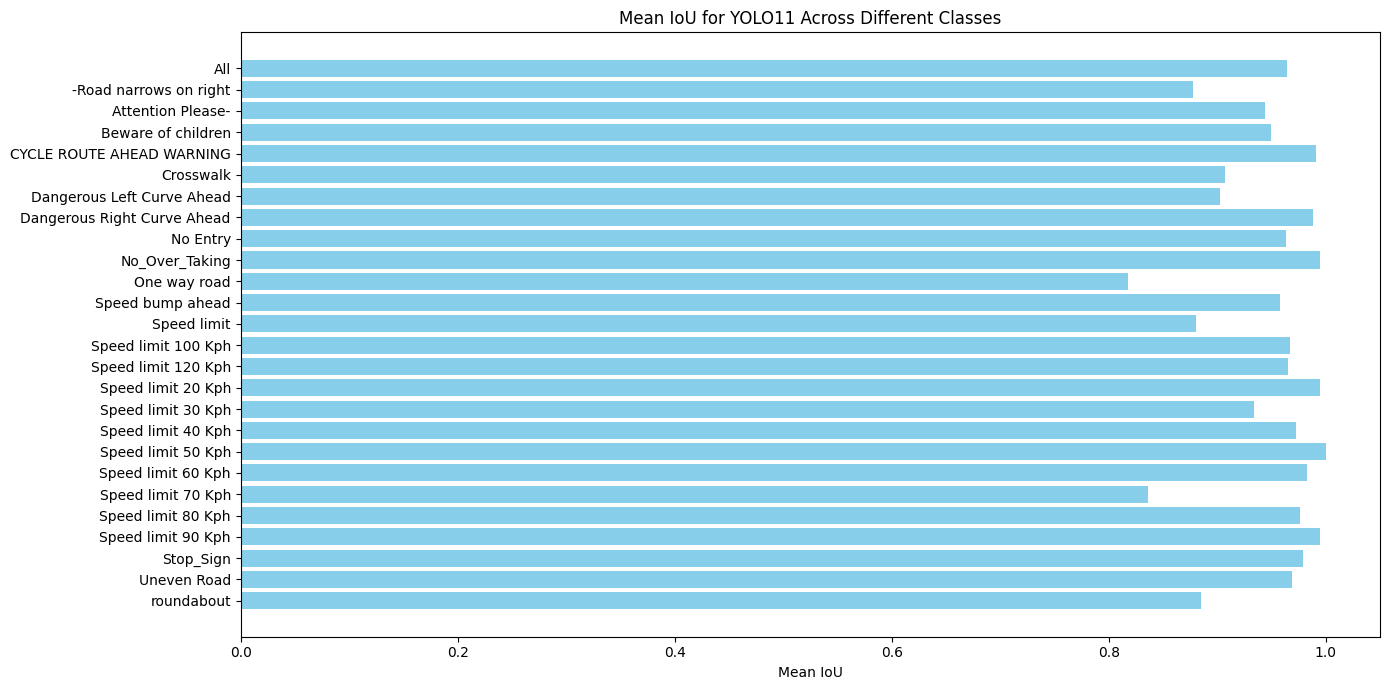

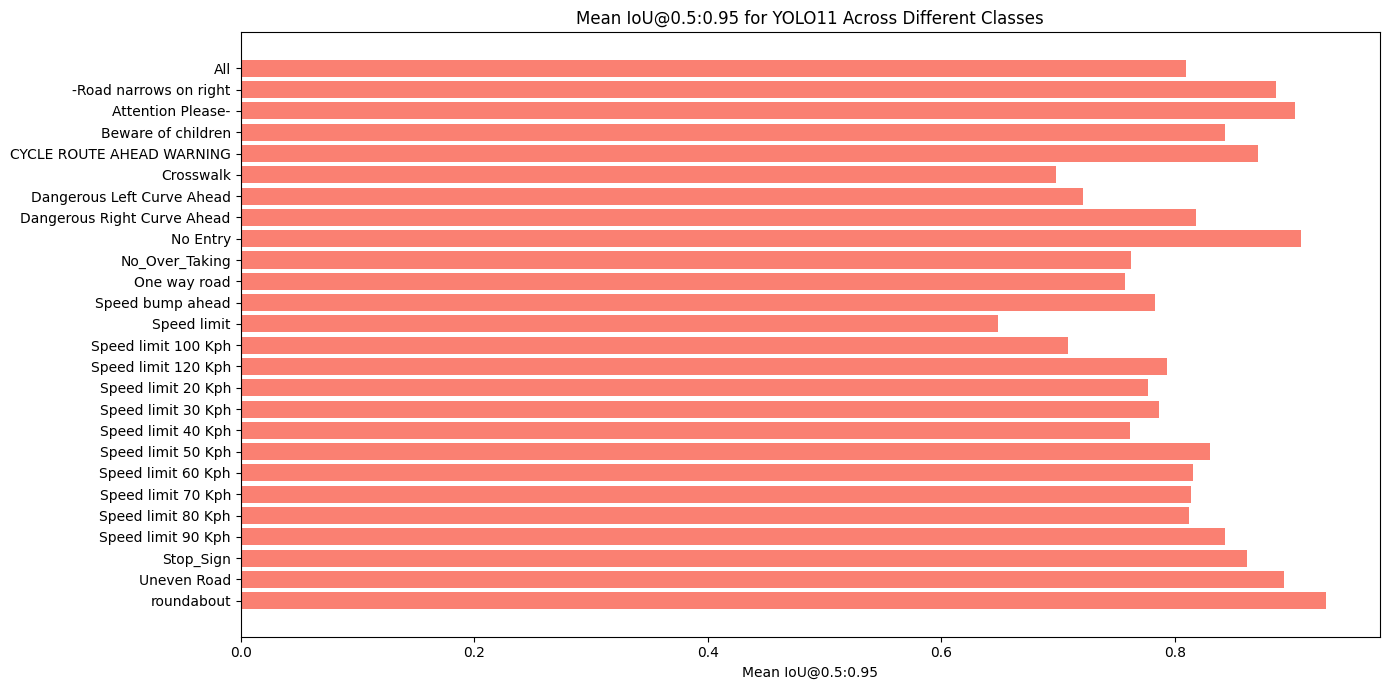

In [ ]:

# Plot Mean IoU for each class
plt.figure(figsize=(14, 7))
plt.barh(iou_df_yolo11["Class"], iou_df_yolo11["Mean IoU"], color="skyblue")
plt.xlabel("Mean IoU")
plt.title("Mean IoU for YOLO11 Across Different Classes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot Mean IoU@0.5:0.95 for each class
plt.figure(figsize=(14, 7))
plt.barh(iou_df_yolo11["Class"], iou_df_yolo11["Mean IoU@0.5:0.95"], color="salmon")
plt.xlabel("Mean IoU@0.5:0.95")
plt.title("Mean IoU@0.5:0.95 for YOLO11 Across Different Classes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The evaluation of YOLO11’s performance on traffic sign detection shows significant improvements over YOLOv8, particularly in terms of Mean IoU (0.964 vs. 0.931) and Mean IoU@0.5:0.95 (0.809 vs. 0.771), indicating a more accurate and consistent detection performance across various classes. YOLO11 demonstrates strong precision in detecting specific classes, such as “No Entry,” “Uneven Road,” and “roundabout,” with high Mean IoU and Mean IoU@0.5:0.95 values, showcasing its ability to identify these distinct features effectively. However, for classes with complex shapes or those prone to visual ambiguity, like “Crosswalk” and “Dangerous Left Curve Ahead,” both models show a moderate drop in IoU scores. This suggests that while YOLO11 has a robust detection capability, certain classes may still benefit from further data augmentation or refinement. Overall, YOLO11 provides a more reliable detection framework for traffic signs, making it a strong candidate for applications requiring high precision in object detection.

# Loading old results used with Yolov8

In [ ]:
model = YOLO('/kaggle/input/yolov8_pretrained/pytorch/default/1/best (1).pt')
metrics = model.val()

print(f"Mean IoU: {metrics.box.map50}")

print(f"Mean IoU@0.5:0.95: {metrics.box.map}")

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
val: Scanning /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid/labels... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:03<00:00, 190.17it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.14it/s]


                   all        623        801      0.909      0.873      0.931      0.771
-Road narrows on right         15         15      0.918      0.933      0.988      0.864
     Attention Please-         23         23      0.978      0.957      0.993       0.89
    Beware of children         23         23      0.904       0.87      0.945      0.842
CYCLE ROUTE AHEAD WARNING         29         29      0.976      0.931      0.977      0.868
             Crosswalk         42         43      0.899       0.93      0.944      0.671
Dangerous Left Curve Ahead         24         24      0.568      0.833      0.644      0.504
Dangerous Rright Curve Ahead         30         30      0.791       0.63      0.822      0.656
              No Entry         26         27          1      0.993      0.995      0.896
        No_Over_Taking         23         23      0.994      0.957      0.973      0.659
          One way road         27         27      0.895      0.778      0.875      0.742
      Sp

In [ ]:
import pandas as pd

# Define the results for YOLOv8 (replace this data with your results for other models as you test them)
data = {
    "Class": ["All", "-Road narrows on right", "Attention Please-", "Beware of children", "CYCLE ROUTE AHEAD WARNING",
              "Crosswalk", "Dangerous Left Curve Ahead", "Dangerous Right Curve Ahead", "No Entry", "No_Over_Taking",
              "One way road", "Speed bump ahead", "Speed limit", "Speed limit 100 Kph", "Speed limit 120 Kph",
              "Speed limit 20 Kph", "Speed limit 30 Kph", "Speed limit 40 Kph", "Speed limit 50 Kph",
              "Speed limit 60 Kph", "Speed limit 70 Kph", "Speed limit 80 Kph", "Speed limit 90 Kph", "Stop_Sign",
              "Uneven Road", "roundabout"],
    "Mean IoU": [0.931, 0.918, 0.978, 0.904, 0.976, 0.899, 0.568, 0.791, 1.0, 0.994, 0.895, 0.991, 0.884, 0.917, 0.84,
                 0.856, 0.92, 0.969, 0.954, 0.881, 1.0, 0.894, 0.855, 0.98, 0.906, 0.943],
    "Mean IoU@0.5:0.95": [0.771, 0.864, 0.89, 0.842, 0.868, 0.671, 0.504, 0.656, 0.896, 0.659, 0.742, 0.827, 0.642,
                          0.716, 0.771, 0.756, 0.753, 0.759, 0.8, 0.772, 0.783, 0.777, 0.785, 0.842, 0.856, 0.846]
}

# Create DataFrame
iou_df = pd.DataFrame(data)

# Display the table
print(iou_df)


                          Class  Mean IoU  Mean IoU@0.5:0.95
0                           All     0.931              0.771
1        -Road narrows on right     0.918              0.864
2             Attention Please-     0.978              0.890
3            Beware of children     0.904              0.842
4     CYCLE ROUTE AHEAD WARNING     0.976              0.868
5                     Crosswalk     0.899              0.671
6    Dangerous Left Curve Ahead     0.568              0.504
7   Dangerous Right Curve Ahead     0.791              0.656
8                      No Entry     1.000              0.896
9                No_Over_Taking     0.994              0.659
10                 One way road     0.895              0.742
11             Speed bump ahead     0.991              0.827
12                  Speed limit     0.884              0.642
13          Speed limit 100 Kph     0.917              0.716
14          Speed limit 120 Kph     0.840              0.771
15           Speed limit

In [ ]:
# Create DataFrame
iou_df = pd.DataFrame(data)
# Display styled DataFrame in Jupyter Notebook
iou_df.style.set_caption("YOLOv8 Mean IoU Results").format({
    "Mean IoU": "{:.3f}",
    "Mean IoU@0.5:0.95": "{:.3f}"
}).background_gradient(cmap="Blues", subset=["Mean IoU"]).background_gradient(cmap="Oranges", subset=["Mean IoU@0.5:0.95"])

,Class,Mean IoU,Mean IoU@0.5:0.95
0,All,0.931,0.771
1,-Road narrows on right,0.918,0.864
2,Attention Please-,0.978,0.890
3,Beware of children,0.904,0.842
4,CYCLE ROUTE AHEAD WARNING,0.976,0.868
5,Crosswalk,0.899,0.671
6,Dangerous Left Curve Ahead,0.568,0.504
7,Dangerous Right Curve Ahead,0.791,0.656
8,No Entry,1.000,0.896
9,No_Over_Taking,0.994,0.659


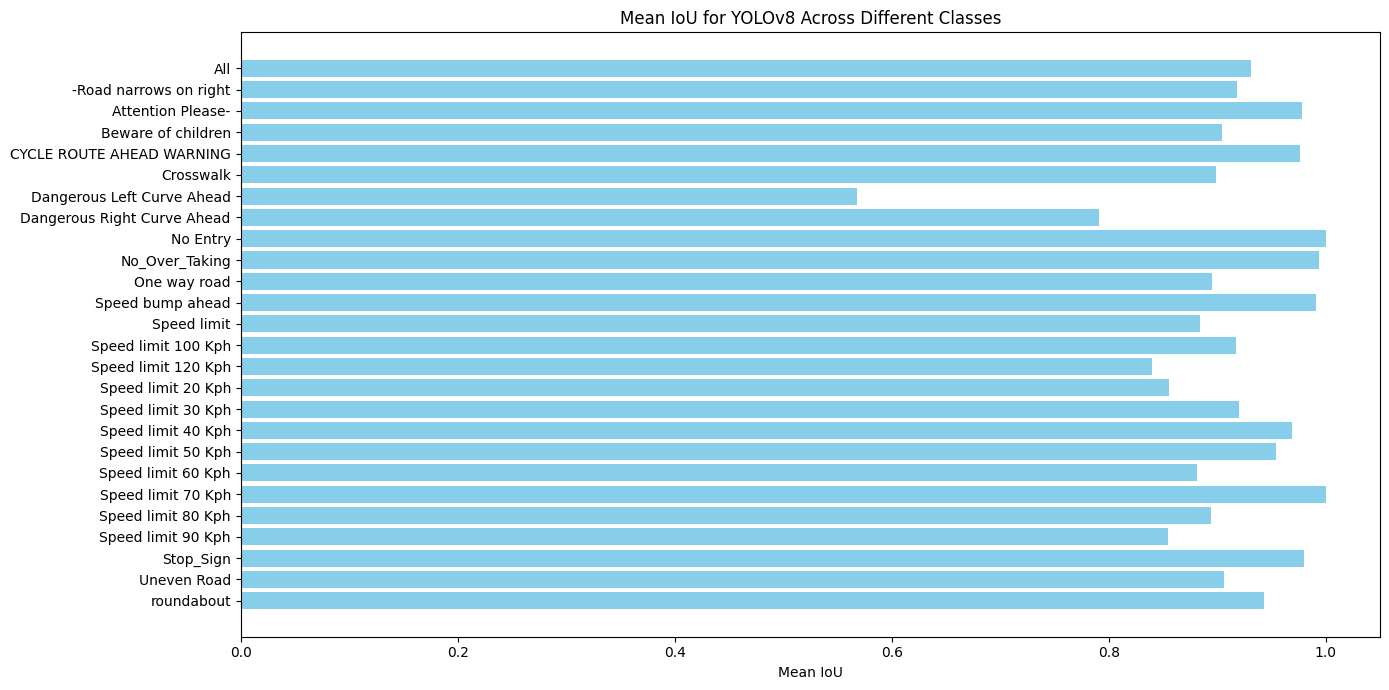

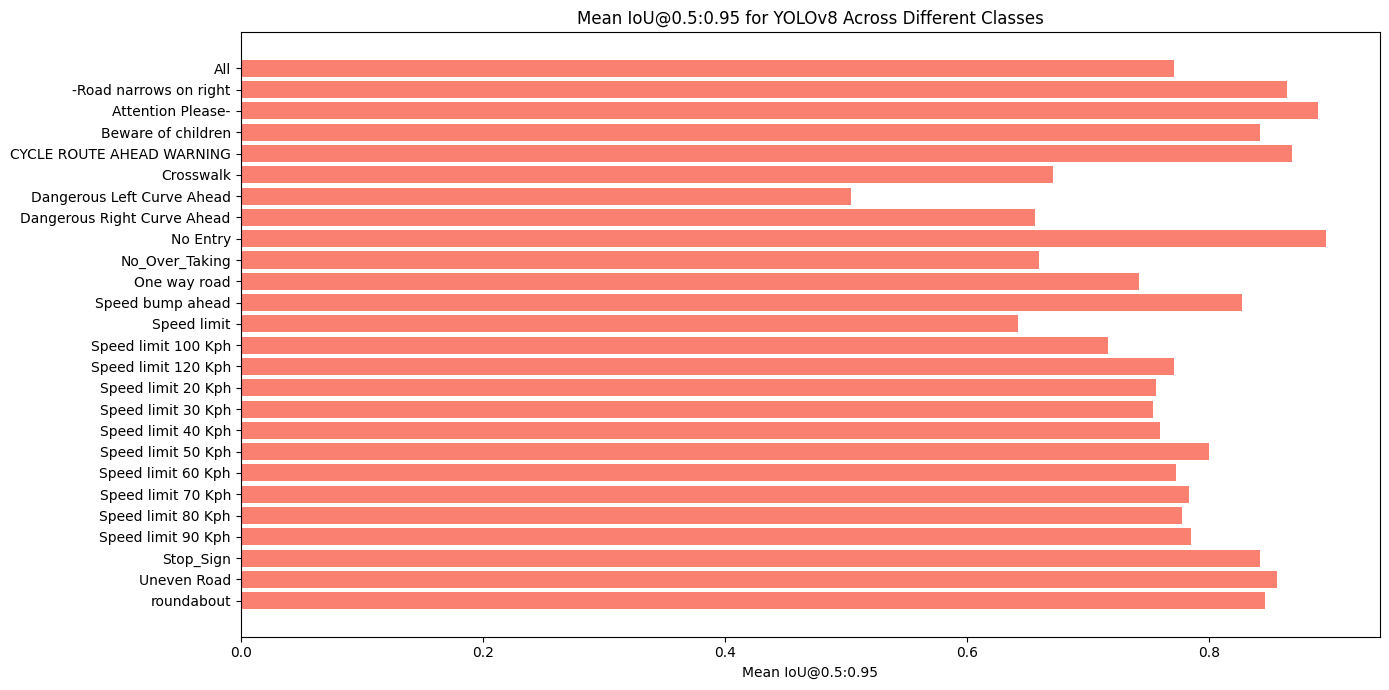

In [ ]:
import matplotlib.pyplot as plt

# Plot Mean IoU for each class
plt.figure(figsize=(14, 7))
plt.barh(iou_df["Class"], iou_df["Mean IoU"], color="skyblue")
plt.xlabel("Mean IoU")
plt.title("Mean IoU for YOLOv8 Across Different Classes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot Mean IoU@0.5:0.95 for each class
plt.figure(figsize=(14, 7))
plt.barh(iou_df["Class"], iou_df["Mean IoU@0.5:0.95"], color="salmon")
plt.xlabel("Mean IoU@0.5:0.95")
plt.title("Mean IoU@0.5:0.95 for YOLOv8 Across Different Classes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The analysis of YOLOv8’s performance across various traffic sign classes reveals key insights into the model’s detection accuracy. With an overall Mean IoU of 0.931 and Mean IoU@0.5:0.95 of 0.771, the model performs robustly in general but shows variability among specific classes. High-performing classes, such as "No Entry," "Stop Sign," and "Speed bump ahead," achieved near-perfect IoU scores, indicating effective model recognition of these signs. However, classes like "Dangerous Left Curve Ahead" and "Crosswalk" had lower IoU values, possibly due to challenges in detecting signs with complex shapes or those commonly subjected to occlusions or visual noise in real-world conditions. The consistency of high IoU across simpler and distinctive sign classes suggests that YOLOv8 is well-suited for detecting signs with unique, highly contrasting features but may require additional fine-tuning or data augmentation to improve detection accuracy for more ambiguous or visually complex signs. These observations indicate potential areas for further model refinement, especially for traffic sign detection scenarios requiring diverse class accuracy.

# Preparing File for Submission

In [ ]:
import pandas as pd
import os
import yaml

# Load class names from data.yaml
with open('/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml', 'r') as file:
    data_yaml = yaml.safe_load(file)


# Get the class names from data.yaml
class_names = data_yaml['names']


# Path to the test images
test_images_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

# Make predictions on the test set
results = model.predict(source=test_images_path)

# Initialize a dictionary to store results
predictions_dict = {}

# Loop through the results and extract predictions
for result in results:
    image_name = os.path.basename(result.path)  # Get only the image name
    classes = []  # List to store class names for the current image

    # Extract predicted classes for each image
    for box in result.boxes:
        class_idx = int(box.cls.cpu().numpy().item())  # Convert to integer
        class_name = class_names[class_idx]  # Map index to class name
        classes.append(class_name)

    # Join the classes into a single string separated by commas
    classes_str = ', '.join(classes)

    # Store the concatenated class names in the dictionary
    if image_name not in predictions_dict:
        predictions_dict[image_name] = classes_str

# Convert the dictionary to a DataFrame
predictions_df = pd.DataFrame(list(predictions_dict.items()), columns=['filename', 'classes'])

# Define the CSV file path
csv_file_path = '/kaggle/working/predictions.csv'

# Save to a CSV file with filename and concatenated classes columns
predictions_df.to_csv(csv_file_path, index=False)

# Print the CSV file path to confirm
print(f"CSV file created: {csv_file_path}")


image 1/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 -Road narrows on right, 117.4ms
image 2/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 -Road narrows on right, 1 Dangerous Left Curve Ahead, 1 Speed limit 20 Kph, 44.7ms
image 3/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 42.1ms
image 4/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 42.0ms
image 5/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00021

# Saving file with bounding boxes

In [ ]:

# Load class names from data.yaml
with open('/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/data.yaml', 'r') as file:
    data_yaml = yaml.safe_load(file)

# Get the class names from data.yaml
class_names = data_yaml['names']

# Path to the test images
test_images_path = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'

# Make predictions on the test set
results = model.predict(source=test_images_path)

# Initialize a list to store results for each image
predictions_list = []

# Loop through the results and extract predictions
for result in results:
    image_name = os.path.basename(result.path)  # Get only the image name

    # Loop through each detected object in the result
    for box in result.boxes:
        class_idx = int(box.cls.cpu().numpy().item())  # Convert to integer
        class_name = class_names[class_idx]  # Map index to class name
        confidence = float(box.conf[0].item())  # Confidence score

        # Extract bounding box coordinates
        bbox = box.xyxy[0].tolist()  # Bounding box in [x1, y1, x2, y2] format

        # Append all data as a single row in the list
        predictions_list.append([image_name, class_name, confidence, *bbox])

# Convert the list to a DataFrame with appropriate column names
predictions_df = pd.DataFrame(predictions_list, columns=['filename', 'class', 'confidence', 'x1', 'y1', 'x2', 'y2'])

# Define the CSV file path
csv_file_path = '/kaggle/working/predictions_with_bboxes.csv'

# Save to a CSV file with bounding boxes, class names, and confidence scores
predictions_df.to_csv(csv_file_path, index=False)

# Print the CSV file path to confirm
print(f"CSV file created: {csv_file_path}")



image 1/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 (no detections), 15.9ms
image 2/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Speed limit 20 Kph, 15.6ms
image 3/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 15.6ms
image 4/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 15.6ms
image 5/308 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed 

# Saving few Predicted Images

In [ ]:

import random
import shutil


# Set up paths
test_image_folder = '/kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test'
output_folder = '/kaggle/working/predicted_images'
os.makedirs(output_folder, exist_ok=True)

# Load the trained model
model = YOLO('/kaggle/input/yolo11-trained/pytorch/default/1/best.pt')

# List of test images
test_images = [img for img in os.listdir(test_image_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select a few images to save
num_images_to_save = 5
images_to_save = random.sample(test_images, num_images_to_save)

# Run predictions only for selected images and save them
for img_file in images_to_save:
    img_path = os.path.join(test_image_folder, img_file)
    results = model.predict(source=img_path, save=True)  # Save prediction to a dynamically created directory

    # Dynamically get the latest prediction directory
    predict_dirs = sorted([d for d in os.listdir("runs/detect") if os.path.isdir(os.path.join("runs/detect", d))])
    predict_dir = os.path.join("runs/detect", predict_dirs[-1])

    # Move the saved image to the output folder
    saved_image_path = os.path.join(predict_dir, img_file)
    if os.path.exists(saved_image_path):
        shutil.move(saved_image_path, output_folder)

print(f"Predicted images saved to {output_folder}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00001_00032_00022_png_jpg.rf.31279153bf33e096a823d677533e0023.jpg: 640x640 1 Speed limit 30 Kph, 15.7ms
Speed: 6.3ms preprocess, 15.7ms inference, 249.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /kaggle/input/data-255-class-competition-road-sign-detection/Road_Sign_Detection  3/test/00001_00032_00000_png_jpg.rf.2259a87e6d9092f6718e56ff7d2329e2.jpg: 640x640 1 No_Over_Taking, 15.7ms
Speed: 3.1ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /kag

# Display some of the images

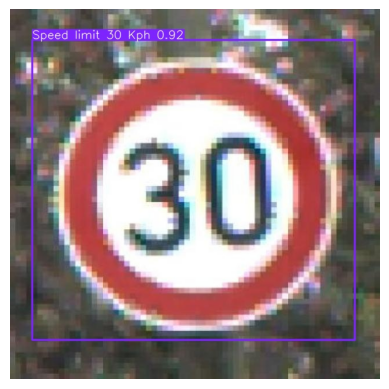

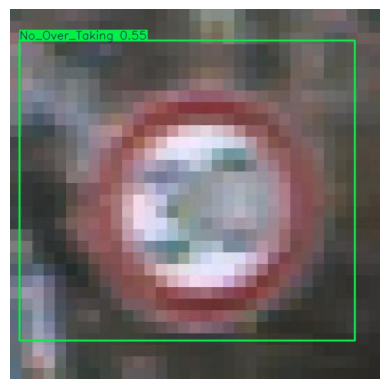

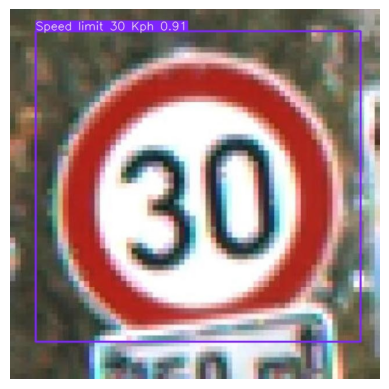

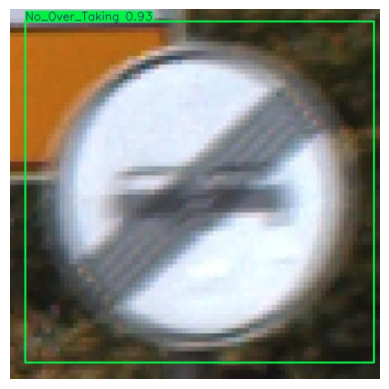

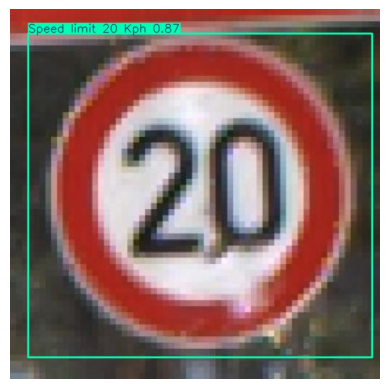

In [ ]:


# Path to the folder where predicted images were saved
output_folder = '/kaggle/working/predicted_images'

# List of images in the output folder
predicted_images = [img for img in os.listdir(output_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select a few images to display (e.g., 3 images)
num_images_to_display = min(5, len(predicted_images))
images_to_display = random.sample(predicted_images, num_images_to_display)

# Display selected images
for img_file in images_to_display:
    img_path = os.path.join(output_folder, img_file)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
